<a href="https://colab.research.google.com/github/putrinahampun/StartupCampusJourney/blob/main/Assignments/04_02_Fire_Putri_Yanti_Nahampun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparation

Peparation biasa dilakukan untuk mempersiapkan data sebelum masuk dalam tahap pemodelan. <br>
Berikut adalah tahapan yang akan dilalui pada data `Cluster S1.csv` (sebuah data yang di-generate secara random) sebelum tahap pemodelan :
1. Import Library
2. Read Dataset
3. Pencarian Model CLuster Terbaik
4. Prosws Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import cluster
from sklearn.metrics import silhouette_score


In [2]:
#Proses pembacaan data dari Sumber
data = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/cluster_s1.csv')
data.head()

,no,x,y
0,NaN,664159,550946
1,NaN,665845,557965
2,NaN,597173,575538
3,NaN,618600,551446
4,NaN,635690,608046


In [3]:
#drop data yang tidak diperlukan perlu
data=data.drop('no', axis = 1)
data.head()

,x,y
0,664159,550946
1,665845,557965
2,597173,575538
3,618600,551446
4,635690,608046


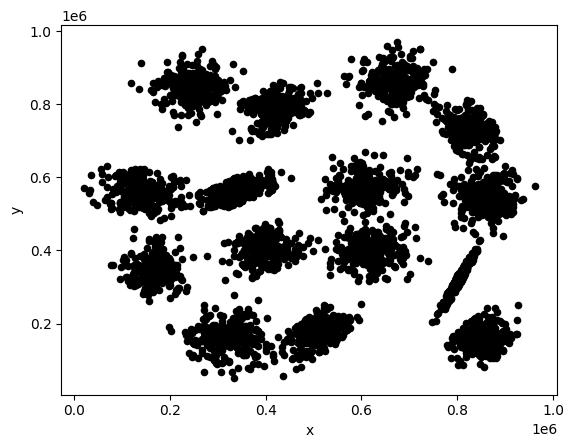

In [4]:
#Lakukan Visualisasi
#Kita plot biar datanya terlihat

%matplotlib inline
ax1 = data.plot.scatter(x='x',y='y',c='Black')

### Lakukan segmentasi data dengan metode Clustering, metode yang digunakan bebas. Hasil akhir akan dievaluasi menggunakan fungsi silhouette score seperti contoh di bawah ini

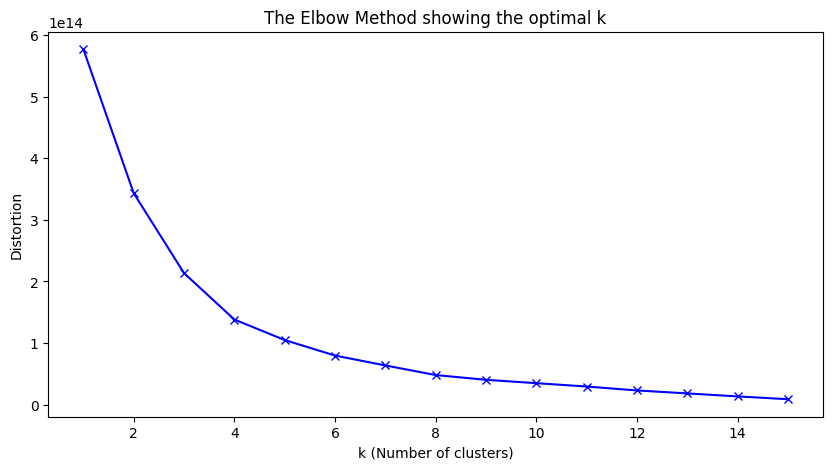

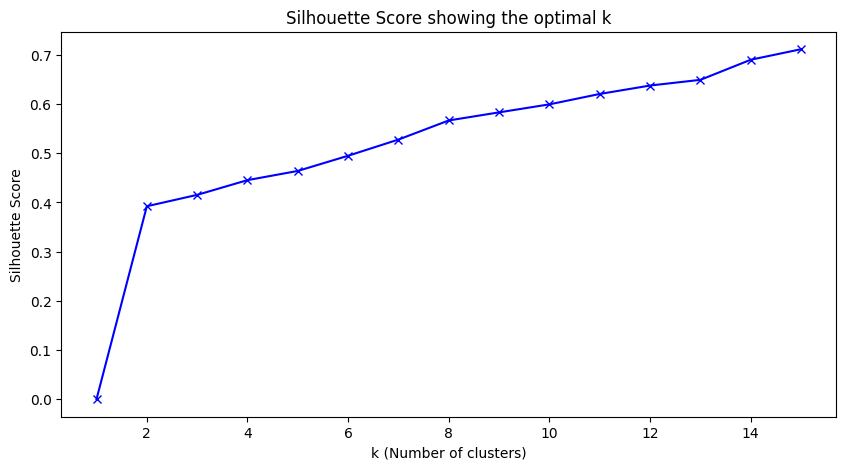

In [44]:
#Lakukan Proses Pencarian CLuster terbaik untuk data diatas
#START CODE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Apply feature scaling
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply dimensionality reduction (optional)
pca = PCA(n_components=2)  # Choose the desired number of components
data_pca = pca.fit_transform(data_scaled)

# Metode Elbow
distortions = []
K = range(1, 16)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k, n_init=10)
    kmeanModel.fit(data)
    distortions.append(kmeanModel.inertia_)

# Plot Metode Elbow
plt.figure(figsize=(10, 5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k (Number of clusters)')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

print('\n')

# Metode Silhouette
silhouette_scores = []
for k in K:
    if k > 1:  # Skip k=1 because it's not valid for Silhouette Score
        kmeans = cluster.KMeans(n_clusters=k, n_init=10, random_state=0)
        labels = kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, labels)
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_scores.append(0)  # Assign 0 for k=1

# Plot Metode Silhouette
plt.figure(figsize=(10, 5))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('k (Number of clusters)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score showing the optimal k')
plt.show()
#END CODE

In [45]:
#Lengkapi Code di bawah ini sehingga menghasilkan evaluasi jumlah cluster terbaik
#Contoh pemanggilan Library CLustering
from sklearn.cluster import KMeans

#START CODE
# Choose the best k (highest silhouette score)
best_k = np.argmax(silhouette_scores) + 1
kmeans = KMeans(n_clusters=best_k, random_state=0)
labels = kmeans.fit_predict(data)

#END CODE

score = silhouette_score(data, labels)
print("silhouette score=",score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


silhouette score= 0.711278614093076


## Proses Visualisasi hasil CLuster

In [46]:
#Proses Visualisasi hasil cluster

#Pertama, masukkan dahulu label hasil clustering ke dalam data

result = data.copy()

#START CODE
result['cluster'] = labels
result.head()
#END CODE

,x,y,cluster
0,664159,550946,10
1,665845,557965,10
2,597173,575538,10
3,618600,551446,10
4,635690,608046,10


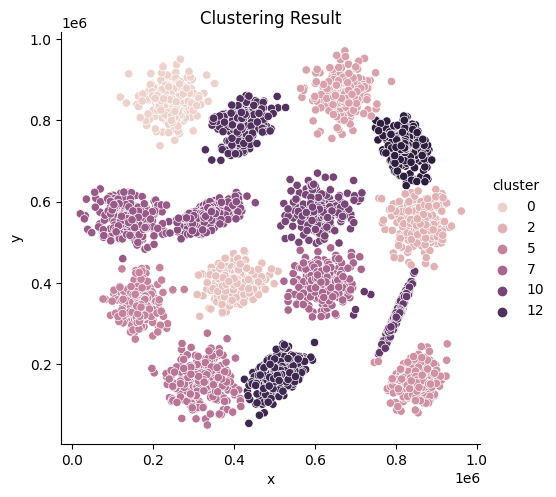

In [47]:
#Lakukan Plotting terhadap data
import seaborn as sns

#Gunakan library seaborn, lebih mudah.

#START CODE
sns.relplot(x='x', y='y', hue='cluster', data=result)
plt.title('Clustering Result')
plt.show()
#END CODE